**CNNによる2次元顔画像表情判定**

In [13]:
!ps aux
!kill -9 <pid>

USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root           1  0.0  0.0    992     4 ?        Ss   Nov05   0:01 /sbin/docker-
root           7  0.0  0.2 346984 39896 ?        Sl   Nov05   0:09 /tools/node/b
root          17  0.0  0.0  35888  4476 ?        Ss   Nov05   0:02 tail -n +0 -F
root          41  0.0  0.2 160352 34004 ?        S    Nov05   0:00 python3 /usr/
root          54  0.0  0.4 205412 59708 ?        Sl   Nov05   0:12 /usr/bin/pyth
root          55  0.2  0.0 708232  5820 ?        Sl   Nov05   0:32 /usr/local/bi
root          66  3.9 20.1 5203980 2680048 ?     Ssl  Nov05   9:31 /usr/bin/pyth
root          86  0.3  0.1 129432 15360 ?        Sl   Nov05   0:48 /usr/bin/pyth
root         132  0.0  0.0  18380   300 ?        S    Nov05   0:00 /bin/bash --n
root         133  0.0  0.1 2167348 17920 ?       Sl   Nov05   0:00 /opt/google/d
root         134  0.0  0.0  11604  2116 ?        S    Nov05   0:01 grep --color=
root         179  2.0  2.1 2597408

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

**訓練画像、検証画像、テスト画像のディレクトリ**

In [16]:
classes = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = '/content/drive/MyDrive/kaggle/Facial Experience'

train_dir = base_dir+'/train'
validation_dir = base_dir+'/valid'
test_dir = base_dir+'/test'

img_rows, img_cols = 48, 48

os.path.join(base_dir,'path')

**ImageDataGeneratorを使って画像データを拡張する**

In [17]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_rows, img_cols),
                                                    color_mode='rgb',
                                                    classes=classes,
                                                    class_mode='categorical',
                                                    batch_size=2048,
                                                    shuffle=True)

Found 93005 images belonging to 7 classes.


train 93005枚
5x11x19x89

In [18]:
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = valid_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(img_rows, img_cols),
                                                        color_mode='rgb',
                                                        classes=classes,
                                                        class_mode='categorical',
                                                        batch_size=256,
                                                        shuffle=True)

Found 17376 images belonging to 7 classes.


valid 17376枚

**CNNモデル**

出力層
二値分類→sigmoid
他クラス分類→softmax
回帰分類→恒等関数

In [19]:
model=Sequential()
# 畳み込み層
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

# 全結合層
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

# 出力層
model.add(Dense(nb_classes, activation='softmax'))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

In [20]:
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**コールバックを使った学習**

In [21]:
hdf5_file = os.path.join(base_dir, 'model.hdf5')

再度ここから

In [46]:
from keras.callbacks import ModelCheckpoint
modelCheckpoint = ModelCheckpoint(filepath = hdf5_file,
                                  monitor='loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)

In [47]:
history = model.fit(train_generator,
                    steps_per_epoch=45,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=67,
                    callbacks=[modelCheckpoint],
                    verbose=1)

Epoch 1/5
45/45 [==============================] - 466s 10s/step - loss: 1.2046 - acc: 0.5693 - val_loss: 1.3994 - val_acc: 0.4822

Epoch 00001: loss improved from inf to 1.20458, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 2/5
45/45 [==============================] - 464s 10s/step - loss: 1.1838 - acc: 0.5794 - val_loss: 1.3663 - val_acc: 0.4939

Epoch 00002: loss improved from 1.20458 to 1.18380, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 3/5
45/45 [==============================] - 466s 10s/step - loss: 1.1571 - acc: 0.5887 - val_loss: 1.3816 - val_acc: 0.4885

Epoch 00003: loss improved from 1.18380 to 1.15709, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 4/5
45/45 [==============================] - 467s 10s/step - loss: 1.1369 - acc: 0.5959 - val_loss: 1.3625 - val_acc: 0.4982

Epoch 00004: loss improved from 1.15709 to 1.13693, saving model to /content/drive/MyDrive/kagg

In [48]:
model.save(hdf5_file)

In [49]:
import matplotlib.pyplot as plt

In [50]:
%matplotlib inline

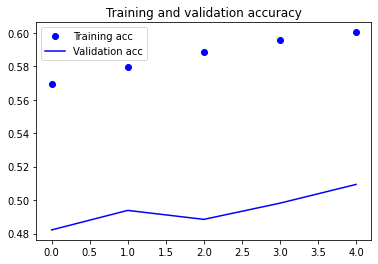

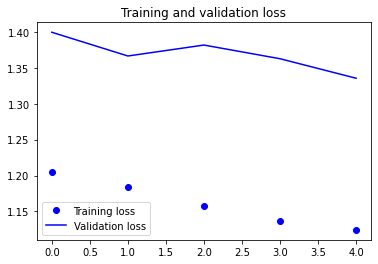

In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**テスト**

In [52]:
# test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [53]:
# model=keras.models.load_model(hdf5_file)

In [54]:
# import numpy as np
# test_generator = test_datagen.flow_from_directory(directory=test_dir,
#                                                   target_size=(img_rows, img_cols),
#                                                   color_mode='rgb',
#                                                   classes=classes,
#                                                   class_mode='categorical',
#                                                   batch_size=32,
#                                                   shuffle=False)

# test_steps_per_Epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

In [55]:
# predictions = model.predict_generator(test_generator, steps=test_steps_per_Epoch)
# # Get most likely class
# predicted_classes = np.argmax(predictions, axis=1)
# # Ground-Truthクラスとクラスラベルを取得する
# true_classes = test_generator.classes
# class_labels = list(test_generator.class_indices.keys())

In [56]:
# from sklearn import metrics
# # scikit-learnを使用して統計を取得する
# report = metrics.classification_report(true_classes, 
#                                        predicted_classes, 
#                                        labels=np.arange(len(classes)),
#                                        target_names=classes)
# print(report)

正解率（accuracy）: accuracy_score()

適合率（precision）: precision_score()

再現率（recall）: recall_score()

F1値（F1-measure）: f1_score()

**混同行列**


In [57]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Y_pred = model.predict_generator(test_generator, test_steps_per_Epoch)
# y_pred = np.argmax(Y_pred, axis=1)
# print("Confusion Matrix")
# # confusion matrixの作成
# cm = confusion_matrix(test_generator.classes, y_pred)
# #表示
# cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
# fig, ax = plt.subplots(figsize=(10, 10))
# cmd.plot(ax=ax, cmap="Blues")

**参考**


*   [Keras / CNN] 多クラス画像分類 --- ラーメンの味分類

    https://qiita.com/Phoeboooo/items/cfe8560fe8a285855340
*   リスト項目

